## PYBER ANALYSIS
* From the pyber analysis, Pyber Ride Sharing scatter plot, we can see that the greatest
*number of rides per city are in Urban areas as would be expected and that the average fairs per city are typically lower in 
*urban areas although the fares are pretty spread out in rural areas. Additionally, looking at the size of the circles *corresponding to the driver count per city on the scatter plot, 
*we can see that the circles are much bigger for Urban areas meaning that there are more drivers in urban areas. Similarly, 
*studying the pie charts, we can see that Urban cities account for more than 50% of total fares and total rides and more than
*80% of the total drivers per city. 


In [26]:
# Dependencies and Setup
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [27]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)


In [30]:
# Combine the data into a single dataset
cityride_df =pd.merge(ride_df, city_df, how ="left", on = "city")
# Display the data table for preview
cityride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [33]:
# Obtain the x and y coordinates for each of the three city types
#Obtain the driver count and average fare information. 
ctype_group = cityride_df.groupby("city").mean()
#print(ctype_group.head())
mean_fare = ctype_group[["fare", "driver_count"]]
ctype_group.head()
mean_fare.head()

,fare,driver_count
city,,
Amandaburgh,24.641667,12.0
Barajasview,25.332273,26.0
Barronchester,36.422500,11.0
Bethanyland,32.956111,22.0
Bradshawfurt,40.064000,7.0


In [61]:
#Obtain the ride count information and put into a dataframe
ctype_count = cityride_df.groupby("city").count()
ride_count = ctype_count[["ride_id"]]
ride_count.head()

,ride_id
city,
Amandaburgh,18
Barajasview,22
Barronchester,16
Bethanyland,18
Bradshawfurt,10


In [62]:
#Get a dataframe with city type information
ctype = cityride_df[["city", "type"]]
ctype.head()


,city,type
0,Lake Jonathanshire,Urban
1,South Michelleport,Urban
2,Port Samanthamouth,Urban
3,Rodneyfort,Urban
4,South Jack,Urban


In [63]:
#Print out the different data frames to be combined. 
print(mean_fare.head())
print(ride_count.head())
print(ctype.head())

                    fare  driver_count
city                                  
Amandaburgh    24.641667          12.0
Barajasview    25.332273          26.0
Barronchester  36.422500          11.0
Bethanyland    32.956111          22.0
Bradshawfurt   40.064000           7.0
               ride_id
city                  
Amandaburgh         18
Barajasview         22
Barronchester       16
Bethanyland         18
Bradshawfurt        10
                 city   type
0  Lake Jonathanshire  Urban
1  South Michelleport  Urban
2  Port Samanthamouth  Urban
3          Rodneyfort  Urban
4          South Jack  Urban


In [57]:
#Put dataframes together to prepare for a scatter plot. 
twomerged_df = pd.merge(ride_count, mean_fare, on = "city")
#print(twomerged_df.head())

merged_df = pd.merge(twomerged_df, ctype, on = "city")
#print(merged_df.head())
#Rename the columns to make sense of the titles.
merged_df = merged_df.rename(columns = {"city": "City", "ride_id": "Ride Count", "fare": "Average Fare", "driver_count": "Driver Count", "type":"Type"})
merged_df = merged_df.set_index("City")
#Drop all dupicates to get unique rows with scatter plot values. 
merged_df = merged_df.drop_duplicates()
print(merged_df.head())

               Ride Count  Average Fare  Driver Count      Type
City                                                           
Amandaburgh            18     24.641667          12.0     Urban
Barajasview            22     25.332273          26.0     Urban
Barronchester          16     36.422500          11.0  Suburban
Bethanyland            18     32.956111          22.0  Suburban
Bradshawfurt           10     40.064000           7.0     Rural


In [59]:
#Create separate data frames for each city type.
urb_df = merged_df[merged_df["Type"]=="Urban"]
urb_df.head()
surb_df = merged_df[merged_df["Type"]=="Suburban"]
surb_df.head()
rral_df = merged_df[merged_df["Type"]=="Rural"]


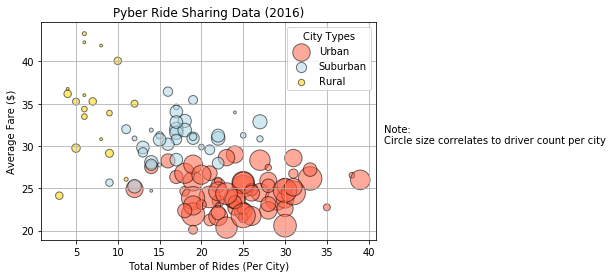

In [60]:
# Build the scatter plots for each city types

plt.scatter(x = urb_df["Ride Count"], y = urb_df["Average Fare"], s = urb_df["Driver Count"]*8, color = 'tomato', alpha = 0.55, edgecolors ="black")
plt.scatter(x = surb_df["Ride Count"], y = surb_df["Average Fare"], s = surb_df["Driver Count"]*8, color = 'lightblue',alpha = 0.55,edgecolors ="black")
plt.scatter(x = rral_df["Ride Count"], y = rral_df["Average Fare"], s = rral_df["Driver Count"]*8, color = 'gold',alpha = 0.55,edgecolors ="black")
# Incorporate the other graph properties
# Create a legend
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.legend(labels=["Urban","Suburban","Rural"], loc = "best", title = "City Types")
plt.grid(True)
# Incorporate a text label regarding circle size
plt.figtext(0.92,0.5,"Note:")
plt.figtext(0.92,0.46,"Circle size correlates to driver count per city")
# Save Figure
plt.savefig("Images/pyberscatter.png")
# Show plot
plt.show()

## Total Fares by City Type

In [40]:
# Calculate Type Percents
totalfares_type = 100*(cityride_df.groupby("type").sum()["fare"]/cityride_df["fare"].sum())

#totalfares = len(cityride_df)
# farepercent = []
# for fare in totalfares_type:
#     fare= fare/totalfares
#     farepercent.append(fare)

# print(totalfares)
# print(farepercent)
print(totalfares_type)

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

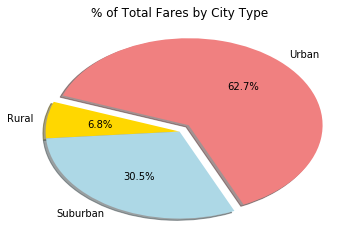

In [41]:
# Build Pie Chart
explode = [0,0,0.1]
labels= ["Rural","Suburban","Urban"]
colors =["gold","lightblue","lightcoral"]
plt.pie(x=totalfares_type, explode=explode, labels = labels, colors =colors, autopct = "%1.1f%%",shadow = True, startangle = 160)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("Images/FaresbyCity.png")
# Show Figure
plt.show




## Total Rides by City Type

In [42]:
# Calculate Ride Percents
typegroupcount = 100*(cityride_df.groupby("type").count()["ride_id"]/cityride_df["ride_id"].count())
#  = cityride_df.groupby("type").count()
# totalrides_type = typegroupcount["ride_id"]
# totalrides = len(cityride_df)
# ridepercent = []
# for ride in totalrides_type:
#     ride = ride/totalrides
#     ridepercent.append(ride)

# print(totalrides)
# print(ridepercent)
print(typegroupcount)

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

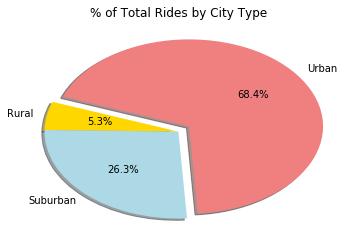

In [43]:
# Build Pie Chart
explode = [0,0,0.1]
labels= ["Rural","Suburban","Urban"]
colors =["gold","lightblue","lightcoral"]
plt.pie(x=typegroupcount, explode=explode, labels = labels, colors =colors, autopct = "%1.1f%%",shadow = True, startangle = 160)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Images/RidesbyCity.png")
# Show Figure
plt.show

## Total Drivers by City Type

In [45]:
# Calculate Driver Percents
totaldrivers_type = 100*(cityride_df.groupby("type").sum()["driver_count"]/cityride_df["driver_count"].sum())
# typegroupsum = cityride_df.groupby("type").sum()["driver_count"]/
# totaldriver_type = typegroupsum["driver_count"]
# totaldrivers = typegroupsum["driver_count"].sum()
# driverpercent = []
# for driver in totaldriver_type:
#     driver = driver/totaldrivers
#     driverpercent.append(driver)
# print(typegroupsum)
# print(totaldrivers)
# print(driverpercent)
print(totaldrivers_type)



type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

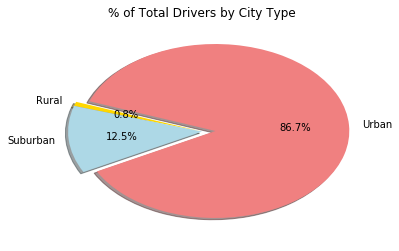

In [56]:
# Build Pie Charts
# Save Figure
explode = [0,0,0.1]
labels= ["Rural","Suburban","Urban"]
colors =["gold","lightblue","lightcoral"]
plt.pie(x=totaldrivers_type, explode=explode, labels = labels, colors =colors, autopct = "%1.1f%%",shadow = True, startangle = 160)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("Images/DriversbyCity.png")
# Show Figure
plt.show